<a href="https://colab.research.google.com/github/OlenaIVA/PET-projects/blob/main/Salary_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Salary Data - Dataset for Linear Regression

In [1]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00


In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image

In [17]:
# Load your data
df = pd.read_csv('/content/Salary_Data.csv')  # Replace with your actual file path



In [18]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [28]:
df.shape

(30, 2)

In [27]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


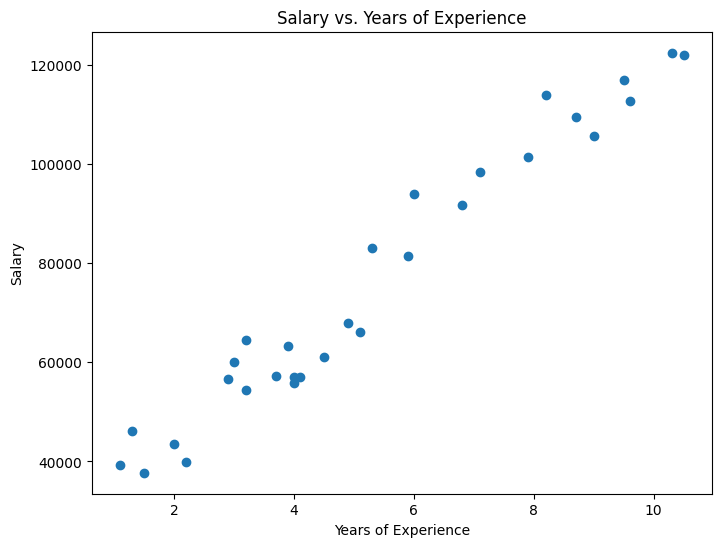

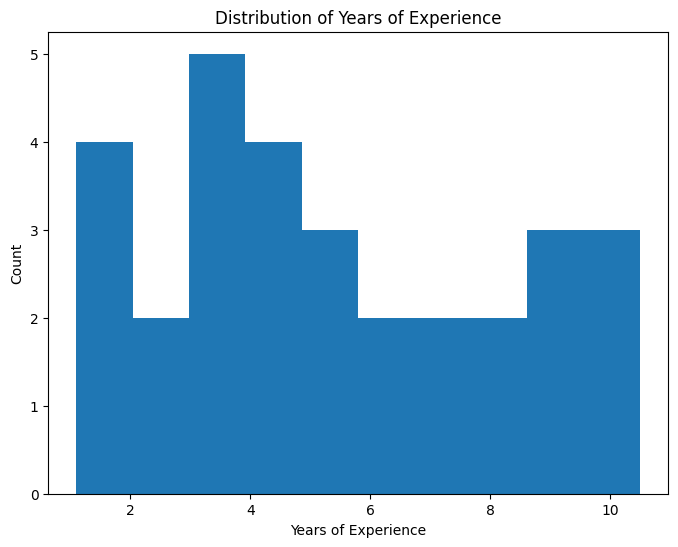

In [30]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')
plt.show()

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['YearsExperience'], bins=10)
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.title('Distribution of Years of Experience')
plt.show()

Dataset Structure
The dataset contains 30 records (rows) and 2 features (columns):

YearsExperience: Number of years of experience
Salary: Salary amount

Statistical Summary

YearsExperience:
Count: 30 entries

Mean: 5.31 years

Standard Deviation: 2.84 years

Minimum: 1.1 years

25th Percentile: 3.2 years (indicating that 25% of employees have less than 3.2 years of experience)

Median (50th Percentile): 4.7 years

75th Percentile: 7.7 years

Maximum: 10.5 years

Salary:
Count: 30 entries

Mean: 76,003

Standard Deviation: 27,414.43

Minimum: 37,731

25th Percentile: 56,720.75

Median (50th Percentile): 65,237

75th Percentile: 100,544.75

Maximum: 122,391


The data shows variability in both years of experience and salary, as indicated by the high standard deviations.
The average salary appears to increase with more experience, which can be observed from the increasing percentile values for salary.
There is a wide range in experience, from 1.1 years to 10.5 years, indicating a diverse level of experience among employees in the sample.
This dataset is suitable for a regression task, where you could build a model to predict salary based on years of experience.

In [19]:
# Prepare data
X = df.drop('Salary', axis=1)  # Modify column name as needed
y = df['Salary']  # Modify column name as needed



In [20]:
# Detect and handle outliers using IQR method
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (y >= lower_bound) & (y <= upper_bound)
X_clean = X[outlier_mask]
y_clean = y[outlier_mask]



Outliers can significantly skew the results of data analysis and model training, leading to misleading interpretations and reduced model performance. Detecting and handling them helps ensure more robust model performance. the IQR method helps in cleaning the dataset by removing outliers that could adversely affect the model's performance and analysis reliability.

In [21]:
# Preprocess data with RobustScaler
scaler = RobustScaler()
X_processed = scaler.fit_transform(X_clean)



This code snippet efficiently sets up a framework for evaluating multiple regression models and helps identify which model might be the most suitable for the given dataset. Model Comparison: You can quickly compare multiple models' performance to identify the most promising one.
Cross-Validation: Provides a more reliable estimate of model performance by splitting the data into multiple training and validation sets.
MSE Metric: Mean Squared Error is a common loss function that indicates how well the model predictions match the actual values.

In [22]:
# Train and evaluate models
models = {
    'Linear Regression': LinearRegression(),
    'Huber Regression': HuberRegressor(epsilon=1.35),
    'RANSAC': RANSACRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

print("\nModel Comparison Results:")
for name, model in models.items():
    cv_scores = cross_val_score(model, X_processed, y_clean, scoring='neg_mean_squared_error', cv=5)
    mse_scores = -cv_scores
    print(f"{name}:")
    print(f"  Mean MSE: {mse_scores.mean():.2f}")
    print(f"  Std MSE: {mse_scores.std():.2f}")




Model Comparison Results:
Linear Regression:
  Mean MSE: 44168849.47
  Std MSE: 16792547.90
Huber Regression:
  Mean MSE: 43231192.25
  Std MSE: 26176813.42
RANSAC:
  Mean MSE: 38322552.51
  Std MSE: 22736510.11
Random Forest:
  Mean MSE: 108657089.83
  Std MSE: 99159660.94
Gradient Boosting:
  Mean MSE: 98902926.95
  Std MSE: 103293570.24


Why Use GridSearchCV for Hyperparameter Tuning:
Optimizes Model Performance: Finds the best hyperparameter combination that minimizes the mean squared error, leading to improved model accuracy.
Systematic Search: Evaluates all possible combinations in the specified grid, ensuring that no potential configuration is overlooked.
Cross-Validation: Reduces overfitting by validating the model on multiple subsets of the data.

In [23]:
# Tune best model (Random Forest in this example)
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_processed, y_clean)
best_model = grid_search.best_estimator_

print("\nBest Model Parameters:")
print(grid_search.best_params_)




Best Model Parameters:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [24]:
# Final evaluation
cv_scores = cross_val_score(best_model, X_processed, y_clean, scoring='neg_mean_squared_error', cv=5)
final_mse = -cv_scores.mean()
print(f"\nFinal Cross-validated MSE: {final_mse:.2f}")




Final Cross-validated MSE: 108657089.83


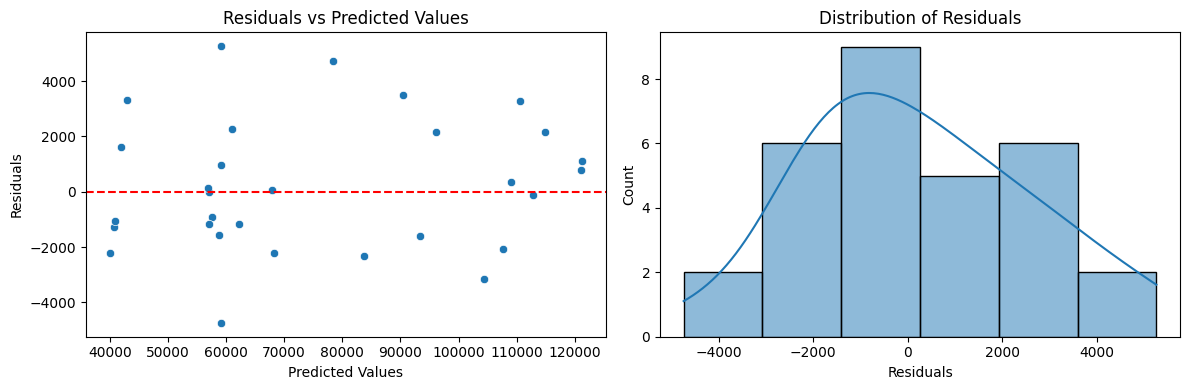

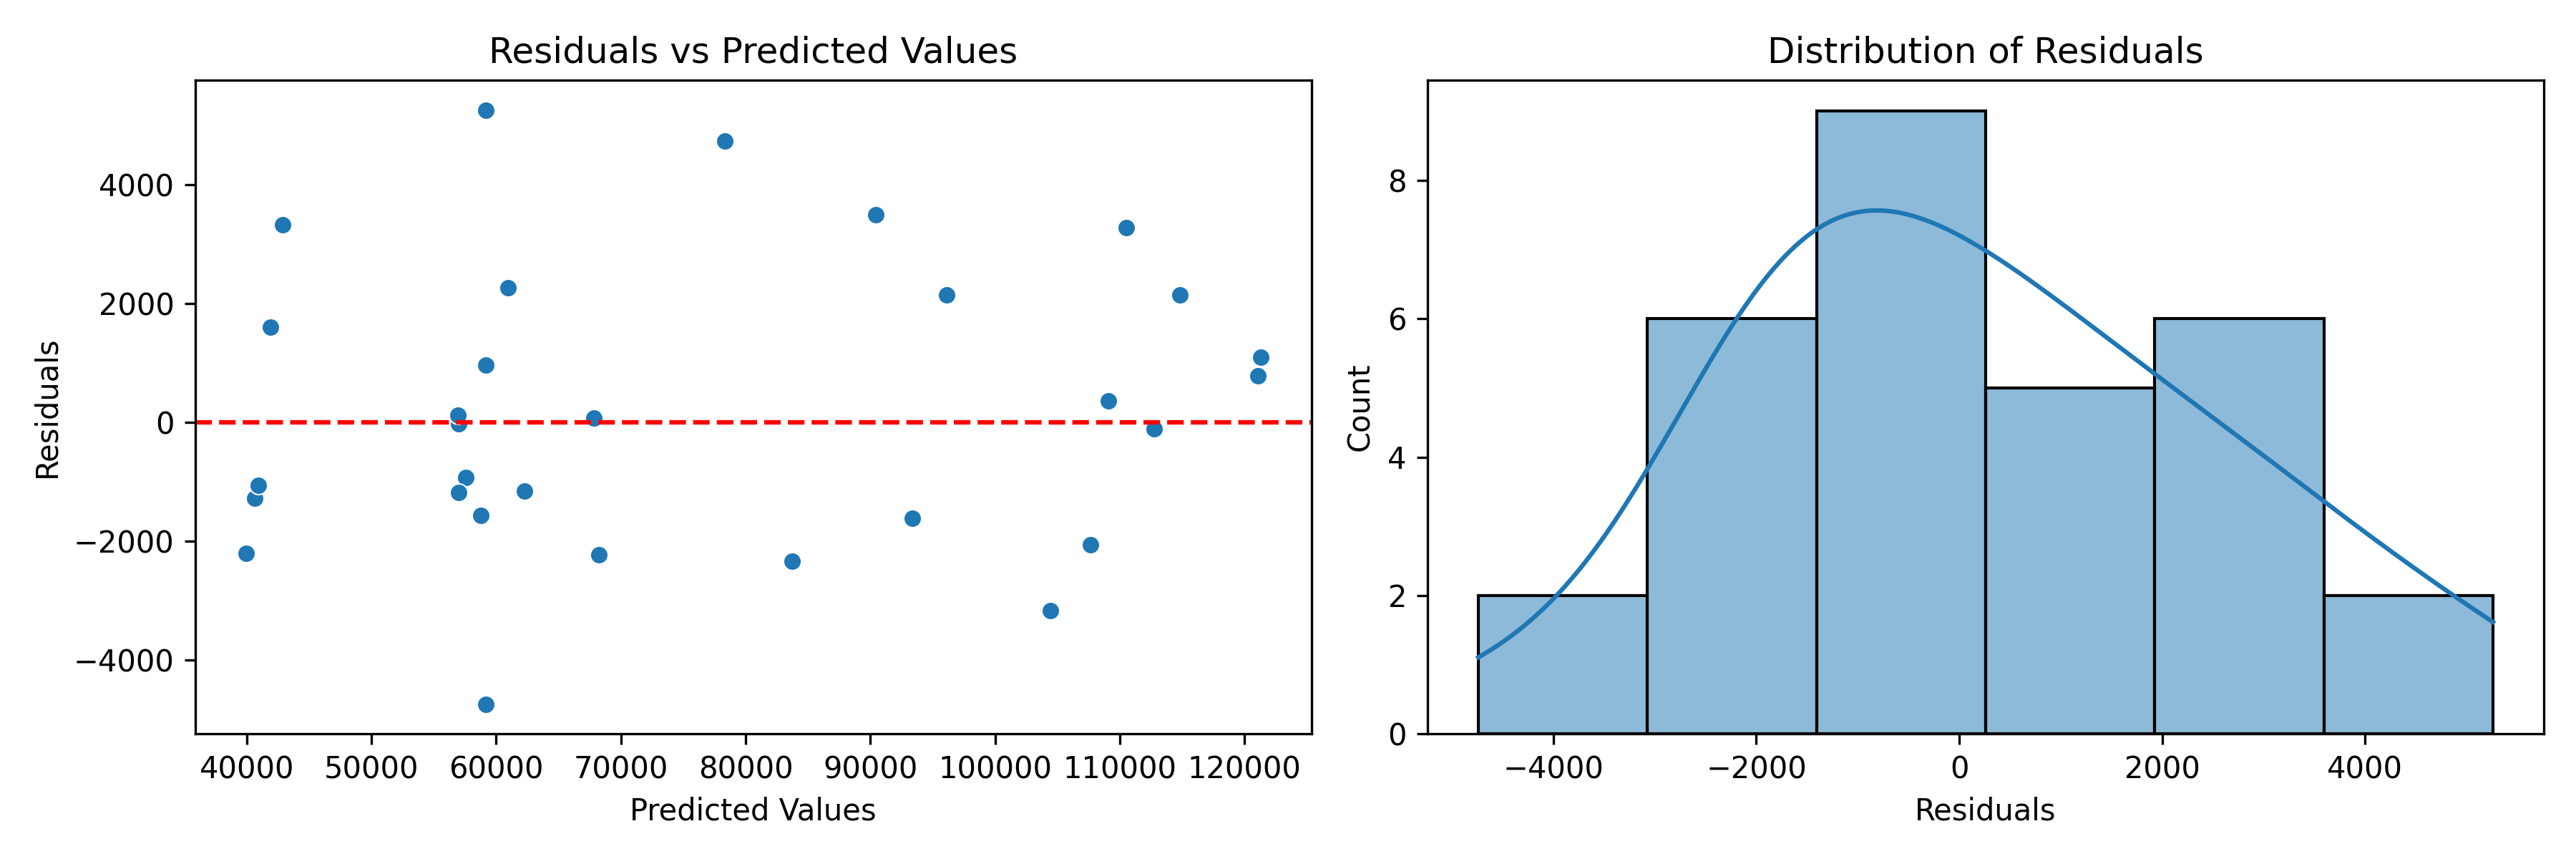

In [25]:


# Plot residuals
y_pred = best_model.predict(X_processed)
residuals = y_clean - y_pred

plt.figure(figsize=(12, 4))

# Residuals vs Predicted Values
plt.subplot(121)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# Distribution of Residuals
plt.subplot(122)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()

# Save the graph as PNG
plt.savefig("residuals_plot.png", format="png", dpi=300)

# Show the plot
plt.show()

# Display the saved image in Jupyter Notebook
Image("residuals_plot.png")
